# NYC OPEN DATA 
### _DATA SCIENCE - ASSESSMENT <a href="https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9">NYC_OPEN_DATA</a>_

### Author : VENKATA LAKSHMI PAVANI NRUSIMHADEVARA

In [3]:


import requests
import pandas as pd
import json
import psycopg2
from sqlalchemy import create_engine 
from dask.diagnostics import ProgressBar
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

## TASKS

1. Find the number of Incidents reported in each Year and Borough with most incident requests

2. Prediction of Type of Complaint

This project is divided in 5 sections:

   ## Introduction

    Exploring The Data

    2.1 The Data

   ## Exploratory Data Analysis (EDA)

    3.1 Missing Data
    
    3.2 Determining Categorical Outliers
    
    3.3 Data Mining

    3.3 Feature Engineering

       3.3.1 Processing Categorical Feature: Label-Encoding
            
       3.3.2  Adding and Removing Features
       

   ## Model Selection

    4.1 Data Preparation: Training and Testing Sets

    4.2 Model Selection: 

     4.2.1 Logistic Regression, Random Forests, KNN 
     
     4.2.2 Multi Class Text Classification : Linear SVC

     4.2.3 Accuracy,Confusion Matrix, Precision, Recall, F1-Score

   ## Prediction of Complaints
   
   ## Data Visualization



# Objective

My goal in this notebook is to clean this unbalnced dataset and do some analysis to understand the data at higher level

# Pipeline

1. Obtaining the data is the first approach in solving the problem.

2. Cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.



# Extracting Data

In [4]:
%time df = dd.read_csv("C:\\EZOIC_ASSESSMENT\\311_Service_Requests_from_2010_to_Present.csv")

Wall time: 233 ms


In [5]:
pd.set_option('display.max_rows',100)
print(df.dtypes)

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                        int64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                          float64
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [5]:
#print(df.head())

#### Some of the datatypes are wrong 

### The data types were initialized incorrectly for some of the columns

String columns should be intialized as 'Object' instead of 'float' we need to convert it in dataframe as below and deal with null values too

In [6]:
%time df1 = dd.read_csv("C:\\EZOIC_ASSESSMENT\\311_Service_Requests_from_2010_to_Present.csv",dtype={'Incident Zip':'object','Vehicle Type': 'object','Bridge Highway Direction': 'object','Bridge Highway Name': 'object','Bridge Highway Segment': 'object','Landmark': 'object','Road Ramp': 'object','Taxi Company Borough': 'object','X Coordinate (State Plane)':'float64','Y Coordinate (State Plane)':'float64'})

Wall time: 269 ms


In [7]:
df1.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

Checking Missing Values on new dataframe

#### MISSING VALUES

In [8]:
missing_values = df1.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
Address Type                  int64
Y Coordinate (State Plane)      ...
dtype: int64
Dask Name: dataframe-sum-agg, 996 tasks

#### MISSING VALUES PERCENTAGE

In [9]:
missing_count = ((missing_values / df1.index.size) * 100)
missing_count

Dask Series Structure:
npartitions=1
Address Type                  float64
Y Coordinate (State Plane)        ...
dtype: float64
Dask Name: mul, 1397 tasks

In [10]:
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct

[###########                             ] | 28% Completed | 53.9s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[#############                           ] | 34% Completed |  1min  2.0s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[##############                          ] | 36% Completed |  1min  8.9s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[###############################         ] | 79% Completed |  2min 26.2s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (20,33) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[################################        ] | 80% Completed |  2min 30.2s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (18,20,33) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[########################################] | 100% Completed |  2min 57.4s


Unique Key                         0.000000
Created Date                       0.000000
Closed Date                        2.690807
Agency                             0.000000
Agency Name                        0.000000
Complaint Type                     0.000000
Descriptor                         1.131278
Location Type                     24.963603
Incident Zip                       5.830547
Incident Address                  18.792759
Street Name                       18.798970
Cross Street 1                    33.027832
Cross Street 2                    33.381905
Intersection Street 1             81.865365
Intersection Street 2             81.898895
Address Type                       6.930854
City                               6.117111
Landmark                          96.974592
Facility Type                     75.266947
Status                             0.000000
Due Date                          61.175572
Resolution Description             2.227937
Resolution Action Updated Date  

1. Now here It is impotrant to remove those columns whose missing value percentage is >60.
2. We cant do operations/trainel model to predict a column whose 60 % of values are missing
3. Borough has 0% values missing 2nd question can be answered but before that check for innacurate characters (Incident Zip)

In [11]:
columns_to_drop = missing_count_pct[missing_count_pct > 60].index
with ProgressBar():
    df_dropped = df1.drop(columns_to_drop, axis=1).persist()

[###########                             ] | 28% Completed | 50.8s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[#############                           ] | 34% Completed | 58.5s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[##############                          ] | 36% Completed |  1min  4.8s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[###############################         ] | 79% Completed |  2min 16.4s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (20,33) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[################################        ] | 80% Completed |  2min 20.1s

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (18,20,33) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


[########################################] | 100% Completed |  2min 44.9s


In [9]:
df_dropped.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Address Type                       object
City                               object
Status                             object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                    object
BBL                               float64
Borough                            object
X Coordinate (State Plane)        float64
Y Coordinate (State Plane)        float64
Open Data Channel Type            

In [13]:
df_dropped.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location
83771,27842649,04/14/2014 08:48:00 AM,04/21/2014 04:45:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Equipment (NC1),NaN,10006,34 WEST STREET,...,1.000168e+09,MANHATTAN,979814.0,196782.0,ONLINE,Unspecified,MANHATTAN,40.706797,-74.016000,"(40.70679678045445, -74.01599985239896)"
83772,27842650,04/14/2014 11:02:00 PM,04/15/2014 08:00:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10036,NaN,...,NaN,MANHATTAN,988913.0,214759.0,PHONE,Unspecified,MANHATTAN,40.756139,-73.983169,"(40.75613911897527, -73.98316894112523)"
83773,27842652,04/14/2014 12:21:00 PM,04/20/2014 06:30:00 PM,DEP,Department of Environmental Protection,Sewer,Defective/Missing Curb Piece (SC4),NaN,11228,NaN,...,NaN,BROOKLYN,984518.0,164775.0,PHONE,Unspecified,BROOKLYN,40.618946,-73.999035,"(40.61894576099455, -73.99903464452899)"
83774,27842653,04/14/2014 01:26:00 PM,04/18/2014 10:45:00 AM,DEP,Department of Environmental Protection,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),NaN,10469,2305 ELY AVENUE,...,2.044220e+09,BRONX,1031185.0,252600.0,PHONE,Unspecified,BRONX,40.859879,-73.830324,"(40.859878648052884, -73.83032415755054)"
83775,27842654,04/14/2014 09:06:00 AM,04/14/2014 09:34:00 AM,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,10472,1691 EAST 174 STREET,...,2.038920e+09,BRONX,1019600.0,243325.0,ONLINE,Unspecified,BRONX,40.834476,-73.872254,"(40.83447552234542, -73.87225419756115)"


In [14]:
a = df1.shape
print("Before dropped Columns",a[0].compute(),a[1])
a = df_dropped.shape
print("After dropped Columns",a[0].compute(),a[1])

Before dropped Columns 22314047 41
After dropped Columns 22314047 29


#### 1. How many incidents were opened in each year (beginning with 2010)?
#### 2. Which borough has the most incidents?

To Answer 1 and 2 and Questions
1. Check Unique Key is not repeating (As Each Unique Key represents a service request)
2. Convert Craeted Date (Incident is craeted on thsi date) look for year variable and count UniqueKeys

In [14]:
df_incidents = pd.read_csv(
    "C:\\EZOIC_ASSESSMENT\\311_Service_Requests_from_2010_to_Present.csv",
    usecols = [
        'Unique Key',
        'Created Date',
        'Closed Date',
        'Borough',
        'City'
    ]
)

In [15]:
df_incidents["Created Date"] = pd.to_datetime(
    df_incidents["Created Date"],
    format = "%m/%d/%Y %H:%M:%S %p"   
)

In [16]:
df_incidents_year = df_incidents[df_incidents['Created Date'].dt.year>2009]
df_incidents_year['Year'] = df_incidents['Created Date'].dt.year
df_incidents_year

,Unique Key,Created Date,Closed Date,City,Borough,Year
0,27842655,2014-04-14 02:42:00,08/20/2014 10:55:00 AM,STATEN ISLAND,STATEN ISLAND,2014
1,27842656,2014-04-14 11:04:00,05/01/2015 02:00:00 PM,BRONX,BRONX,2014
2,27842659,2014-04-14 01:27:00,04/14/2014 03:03:00 PM,Queens Village,QUEENS,2014
3,27842660,2014-04-14 12:51:00,04/14/2014 02:15:00 PM,STATEN ISLAND,STATEN ISLAND,2014
4,27842663,2014-04-14 12:35:00,04/14/2014 02:28:00 PM,Jamaica,QUEENS,2014
5,27842665,2014-04-14 09:11:00,04/17/2014 01:00:00 PM,STATEN ISLAND,STATEN ISLAND,2014
6,27842668,2014-04-14 12:35:00,04/15/2014 09:35:00 AM,BROOKLYN,BROOKLYN,2014
7,27842670,2014-04-14 08:16:00,04/24/2014 11:15:00 AM,NEW YORK,MANHATTAN,2014
8,27842671,2014-04-14 12:29:00,04/14/2014 07:10:00 PM,STATEN ISLAND,STATEN ISLAND,2014
9,27842672,2014-04-14 01:11:00,04/14/2014 07:00:00 AM,East Elmhurst,QUEENS,2014


In [17]:
k = pd.DataFrame(df_incidents_year[['Unique Key']].groupby(df_incidents_year['Year']).agg(['count'])).reset_index()
k
#k.info()

,Year,Unique Key
,,count
0,2010,2031813
1,2011,1961598
2,2012,1796172
3,2013,1839974
4,2014,2114000
5,2015,2300760
6,2016,2391426
7,2017,2491969
8,2018,2747950


In [18]:
k.to_csv("C:\\EZOIC_ASSESSMENT\\IncidentTrendByYear.csv",index=False)

In [19]:
l = pd.DataFrame(df_incidents_year[['Unique Key']].groupby(df_incidents_year['Borough']).agg(['count'])).reset_index()
l

,Borough,Unique Key
,,count
0,BRONX,3891635
1,BROOKLYN,6642260
2,MANHATTAN,4345863
3,QUEENS,5103254
4,STATEN ISLAND,1119291
5,Unspecified,1211744


In [20]:
l.to_csv("C:\\EZOIC_ASSESSMENT\\BoroughIncidents.csv",index=False)

### Brooklyn has more Incidents

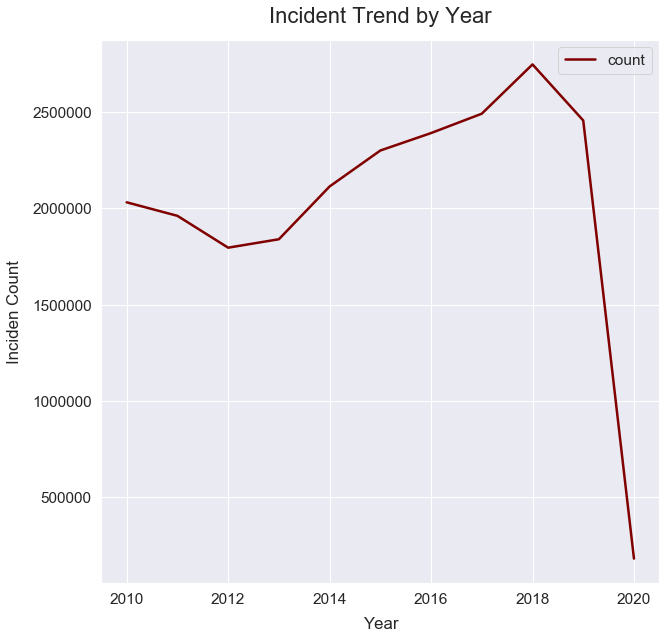

In [21]:
sns.set(font_scale=1.4)
k.set_index('Year')['Unique Key'].plot(figsize=(10, 10), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=10)
plt.ylabel("Inciden Count", labelpad=10)
plt.title("Incident Trend by Year", y=1.02, fontsize=22);

In [22]:
#df_incidents_year.groupby('Year')['Unique Key'].agg(['sum','count'])['count']

In [23]:
print("Divisons",df_dropped.divisions)
print("Partitions",df_dropped.npartitions)

Divisons (None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 

#### Things to Look into
1. Incident ZipCode
2. Unspecified borough
3. Data Type of Columns associated with date


## Handling Zip Values

In [24]:
df_dropped.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location
0,27842655,04/14/2014 02:42:00 PM,08/20/2014 10:55:00 AM,DEP,Department of Environmental Protection,Water System,Defective Street Cut (WZZ1),NaN,10303,2560 RICHMOND TERRACE,...,5.011500e+09,STATEN ISLAND,943586.0,171622.0,ONLINE,Unspecified,STATEN ISLAND,40.637646,-74.146516,"(40.63764599489574, -74.14651579795446)"
1,27842656,04/14/2014 11:04:00 AM,05/01/2015 02:00:00 PM,DEP,Department of Environmental Protection,Sewer,Catch Basin Sunken/Damaged/Raised (SC1),NaN,10460,880 EAST TREMONT AVENUE,...,2.029600e+09,BRONX,1015835.0,246349.0,PHONE,Unspecified,BRONX,40.842790,-73.885846,"(40.842789784424255, -73.88584568128475)"
2,27842659,04/14/2014 01:27:00 PM,04/14/2014 03:03:00 PM,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,11428,220-05 93 AVENUE,...,4.107330e+09,QUEENS,1057568.0,202719.0,PHONE,Unspecified,QUEENS,40.722790,-73.735491,"(40.722789705537885, -73.73549132976942)"
3,27842660,04/14/2014 12:51:00 PM,04/14/2014 02:15:00 PM,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,10301,128 BENZIGER AVENUE,...,5.000380e+09,STATEN ISLAND,961206.0,172373.0,PHONE,Unspecified,STATEN ISLAND,40.639771,-74.083032,"(40.63977069540825, -74.08303207959038)"
4,27842663,04/14/2014 12:35:00 PM,04/14/2014 02:28:00 PM,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,11434,132-41 BENNETT COURT,...,4.129840e+09,QUEENS,1050264.0,186435.0,PHONE,Unspecified,QUEENS,40.678152,-73.762001,"(40.678151620421175, -73.76200138093122)"


In [25]:
df_dropped.shape

(Delayed('int-16c4a519-8cf2-451a-9ad0-56f2c97514a7'), 29)

In [21]:
df_dropped['Incident Zip'].unique().compute()


0      10303
1      10460
2      11428
3      10301
4      11434
5      11210
6      10017
7      10312
8      11370
9      11355
10     10467
11     10304
12     11357
13     11226
14     11214
15     10009
16     10003
17     11217
18     11201
19     11236
20     11211
21     11378
22     10162
23     11429
24     11354
25     11375
26     11235
27     10463
28     11432
29     10013
30     10306
31     11436
32     11231
33     10472
34     11420
35     11414
36     10011
37     11377
38     11360
39     11101
40     11423
41     11218
42     10465
43     11204
44     11232
45     11249
46     10464
47     11361
48     11229
49     11220
       ...  
813    14726
814    10590
815    10582
816    12189
817    16335
818    11408
819    11307
820    19139
821    13601
822    11799
823    13053
824    11765
825    12775
826    14303
827    10516
828    10396
829    11091
830    11937
831    14266
832    12144
833    18064
834    18034
835    10156
836    11809
837    11646
838    18017

In [12]:
#NY Zip codes : https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm
def clean_zip(zip_code):
    try:
        zip_code = int(float(zip_code))
    except:
        try:
            zip_code = int(float(zip_code.split('-')[0]))
        except:
            return np.nan
    if zip_code < 10000 or zip_code > 19999:
        return np.nan
    else:
        return str(zip_code)

In [13]:
df_dropped['Incident Zip'] = df_dropped['Incident Zip'].apply(clean_zip)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


In [12]:
### Are there any null values
df_dropped['Incident Zip'].isnull().values.any().compute()

True

#### Remove all those columns who zip code is null or nan

In [14]:
df_dropped = df_dropped[df_dropped['Incident Zip'].notnull()]

In [31]:
a = df_dropped.shape
print("After Zip Clean",a[0].compute(),a[1])

After Zip Clean 21006138 29


#### Data Type of Date Columns

In [32]:
df_dropped.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Address Type                       object
City                               object
Status                             object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                    object
BBL                               float64
Borough                            object
X Coordinate (State Plane)        float64
Y Coordinate (State Plane)        float64
Open Data Channel Type            

## Dealing with DATE Columns

In [33]:
df_dropped["Created Date"].head(10)

0    04/14/2014 02:42:00 PM
1    04/14/2014 11:04:00 AM
2    04/14/2014 01:27:00 PM
3    04/14/2014 12:51:00 PM
4    04/14/2014 12:35:00 PM
5    04/14/2014 09:11:00 PM
6    04/14/2014 12:35:00 PM
7    04/14/2014 08:16:00 AM
8    04/14/2014 12:29:00 PM
9    04/14/2014 01:11:00 AM
Name: Created Date, dtype: object

In [15]:
df_dropped["Created Date"] = dd.to_datetime(df_dropped["Created Date"],format = "%m/%d/%Y %I:%M:%S %p",errors = 'coerce')

In [28]:
df_dropped["Created Date"].head(30)

0    2014-04-14 14:42:00
1    2014-04-14 11:04:00
2    2014-04-14 13:27:00
3    2014-04-14 12:51:00
4    2014-04-14 12:35:00
5    2014-04-14 21:11:00
6    2014-04-14 12:35:00
7    2014-04-14 08:16:00
8    2014-04-14 12:29:00
9    2014-04-14 01:11:00
10   2014-04-14 07:43:00
11   2014-04-14 09:32:00
12   2014-04-14 11:59:00
13   2014-04-14 15:40:00
14   2014-04-14 12:13:00
15   2014-04-14 18:48:00
16   2014-04-14 13:21:00
17   2014-04-14 12:32:00
18   2014-04-14 11:38:00
19   2014-04-14 15:13:00
20   2014-04-14 00:00:00
21   2014-04-14 15:11:00
22   2014-04-14 14:41:00
23   2014-04-14 12:31:00
24   2014-04-14 07:27:00
25   2014-04-14 00:00:00
26   2014-04-14 08:46:01
27   2014-04-11 09:18:32
28   2014-04-14 00:00:00
29   2014-04-14 10:39:59
Name: Created Date, dtype: datetime64[ns]

In [16]:
df_dropped["Closed Date"] = dd.to_datetime(df_dropped["Closed Date"],format = "%m/%d/%Y %I:%M:%S %p",errors = 'coerce')

In [30]:
df_dropped["Closed Date"].head()

0   2014-08-20 10:55:00
1   2015-05-01 14:00:00
2   2014-04-14 15:03:00
3   2014-04-14 14:15:00
4   2014-04-14 14:28:00
Name: Closed Date, dtype: datetime64[ns]

In [38]:
df_dropped["Resolution Action Updated Date"].head()

0    08/20/2014 10:55:00 AM
1    05/01/2015 02:00:00 PM
2    04/14/2014 03:03:00 PM
3    04/14/2014 02:15:00 PM
4    04/14/2014 02:28:00 PM
Name: Resolution Action Updated Date, dtype: object

In [17]:
#Resolution Action Updated Date
df_dropped["Resolution Action Updated Date"] = dd.to_datetime(df_dropped["Resolution Action Updated Date"],format = "%m/%d/%Y %I:%M:%S %p",errors = 'coerce')

In [18]:
df_dropped["Resolution Action Updated Date"].head()

0   2014-08-20 10:55:00
1   2015-05-01 14:00:00
2   2014-04-14 15:03:00
3   2014-04-14 14:15:00
4   2014-04-14 14:28:00
Name: Resolution Action Updated Date, dtype: datetime64[ns]

In [19]:
df_dropped['Total_Time'] =  (df_dropped['Closed Date']- df_dropped['Created Date']).dt.days

In [20]:
df_dropped['Resolution_Time'] =  (df_dropped['Resolution Action Updated Date']- df_dropped['Created Date']).dt.days

In [21]:
df_dropped['Total_Time'].head(10)

0    127.0
1    382.0
2      0.0
3      0.0
4      0.0
5      2.0
6      0.0
7     10.0
8      0.0
9      0.0
Name: Total_Time, dtype: float64

In [22]:
df_dropped['Resolution_Time'].head(10)

0    127.0
1    382.0
2      0.0
3      0.0
4      0.0
5      2.0
6      0.0
7     10.0
8      0.0
9      0.0
Name: Resolution_Time, dtype: float64

##### Closed Date > Created Date always so something is wrong in the incidents otherwise
##### negative (WRONG!!) has to eliminated

In [45]:
df_dropped.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Status                                    object
Resolution Description                    object
Resolution Action Updated Date    datetime64[ns]
Community Board                           object
BBL                                      float64
Borough             

In [23]:
df_dropped[df_dropped['Total_Time']<0].head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time
39,27842719,2014-04-14 10:02:00,2014-04-11 10:02:00,DOT,Department of Transportation,Street Light Condition,Fixture/Luminaire Door Open,NaN,11231,NaN,...,980851.0,186934.0,UNKNOWN,Unspecified,BROOKLYN,40.679767,-74.012255,"(40.67976675817528, -74.01225461123266)",-3.0,-3.0
54,27842739,2014-04-12 13:46:45,2014-04-12 12:35:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11232,2 AVENUE,...,981607.0,178360.0,UNKNOWN,Unspecified,BROOKLYN,40.656233,-74.009526,"(40.656233297034625, -74.00952559923958)",-1.0,-1.0
77,27842788,2014-04-14 16:39:00,2014-04-11 16:39:00,DOT,Department of Transportation,Street Light Condition,Street Light Dayburning,NaN,10462,NaN,...,1026117.0,243564.0,UNKNOWN,Unspecified,BRONX,40.835103,-73.848702,"(40.83510301726856, -73.84870198819223)",-3.0,-3.0


In [47]:
df_dropped[df_dropped['Resolution_Time']<0].head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time
39,27842719,2014-04-14 10:02:00,2014-04-11 10:02:00,DOT,Department of Transportation,Street Light Condition,Fixture/Luminaire Door Open,NaN,11231,NaN,...,980851.0,186934.0,UNKNOWN,Unspecified,BROOKLYN,40.679767,-74.012255,"(40.67976675817528, -74.01225461123266)",-3.0,-3.0
54,27842739,2014-04-12 13:46:45,2014-04-12 12:35:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11232,2 AVENUE,...,981607.0,178360.0,UNKNOWN,Unspecified,BROOKLYN,40.656233,-74.009526,"(40.656233297034625, -74.00952559923958)",-1.0,-1.0
77,27842788,2014-04-14 16:39:00,2014-04-11 16:39:00,DOT,Department of Transportation,Street Light Condition,Street Light Dayburning,NaN,10462,NaN,...,1026117.0,243564.0,UNKNOWN,Unspecified,BRONX,40.835103,-73.848702,"(40.83510301726856, -73.84870198819223)",-3.0,-3.0


In [48]:
df_columns = list(df_dropped.columns)
df_dropped[df_columns].count().compute()

Unique Key                        21006138
Created Date                      21006138
Closed Date                       20435875
Agency                            21006138
Agency Name                       21006138
Complaint Type                    21006138
Descriptor                        20756732
Location Type                     16483394
Incident Zip                      21006138
Incident Address                  17667558
Street Name                       17667367
Cross Street 1                    14594744
Cross Street 2                    14580414
Address Type                      20113724
City                              20934666
Status                            21006138
Resolution Description            20520659
Resolution Action Updated Date    20844385
Community Board                   21006138
BBL                               17188412
Borough                           21006138
X Coordinate (State Plane)        20278727
Y Coordinate (State Plane)        20278727
Open Data C

In [24]:
# Remove all data from df that have negative Processing Time
df_dropped = df_dropped[df_dropped['Total_Time']>=0]

In [25]:
df_dropped = df_dropped[df_dropped['Resolution_Time']>=0]

In [51]:
df_columns = list(df_dropped.columns)
df_dropped[df_columns].count().compute()

Unique Key                        19898733
Created Date                      19898733
Closed Date                       19898733
Agency                            19898733
Agency Name                       19898733
Complaint Type                    19898733
Descriptor                        19660194
Location Type                     15932251
Incident Zip                      19898733
Incident Address                  16943691
Street Name                       16943515
Cross Street 1                    13947515
Cross Street 2                    13933448
Address Type                      19072196
City                              19831929
Status                            19898733
Resolution Description            19479773
Resolution Action Updated Date    19898733
Community Board                   19898733
BBL                               16521230
Borough                           19898733
X Coordinate (State Plane)        19182986
Y Coordinate (State Plane)        19182986
Open Data C

##### Boroughs ---> Unspecified ?

Booroughs>Cities>Agency

In [24]:
df_dropped[df_dropped['Borough']!='Unspecified'][['City','Borough','Agency']].head(10)

,City,Borough,Agency
0,STATEN ISLAND,STATEN ISLAND,DEP
1,BRONX,BRONX,DEP
2,Queens Village,QUEENS,DEP
3,STATEN ISLAND,STATEN ISLAND,DEP
4,Jamaica,QUEENS,DEP
5,STATEN ISLAND,STATEN ISLAND,DEP
6,BROOKLYN,BROOKLYN,DEP
7,NEW YORK,MANHATTAN,DEP
8,STATEN ISLAND,STATEN ISLAND,DEP
9,East Elmhurst,QUEENS,DEP


I am bit skeptic about my city values they tend to be nulls

## Dealing with CITIES

#### Turning all of them in lower case just to avoid confusion in future

In [26]:
def case_sense(city):
    try:
        city = city.split(' ')
        city = ' '.join([x.lower().capitalize() for x in city])
        if city == 'Unknown':
            return np.nan
        else:
            return city
    except:
        return np.nan

In [27]:
df_dropped['City'] = df_dropped['City'].apply(case_sense)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


In [42]:
(df_dropped[df_dropped['City'].isnull()].groupby('Agency')['Status'].count()).compute()

Agency
DOT      12959
NYPD     40009
DHS       2786
DOITT       43
DPR       5499
TLC       4656
DCA        420
DOE         26
DOHMH      415
DFTA         4
Name: Status, dtype: int64

In [27]:
city_null_dot = len(df_dropped[(df_dropped['City'].isnull()) & (df_dropped['Agency']=='NYPD')].index)
dot_total = len(df_dropped[df_dropped['Agency']=='NYPD'].index)
city_null_dot_perct = (city_null_dot/dot_total)*100
print("%1.3f"%city_null_dot_perct)

0.751


0.8% only for NPYD is very small amount so City NULLs can be deleted from dataset as they dont serve our model

In [28]:
df_dropped = df_dropped[df_dropped['City'].notnull()]

In [70]:
Borough_Unspecified = df_dropped[df_dropped['Borough']=='Unspecified'][['Agency', 'City']]
Borough_Unspecified.shape[0].compute()

809888

In [52]:
df_dropped['Borough'].drop_duplicates().compute()

0        STATEN ISLAND
1                BRONX
2               QUEENS
6             BROOKLYN
7            MANHATTAN
31130      Unspecified
Name: Borough, dtype: object

There are only 5 boroughs in NY so can we predict the unspecified boroughs based on Cities (Coz we already cleaned Cities)

1. City
2. Street Name
3. Location


In [29]:
from dask.distributed import Client 
client = Client() # start a local Dask client

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\bokeh\core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


In [58]:
df_dropped['Street Name'].count().compute()

16877078

In [59]:
df_dropped['Location'].count().compute()

19124175

In [29]:
df_dropped = df_dropped[df_dropped['Borough'] != 'Unspecified']

## Analyzing COMPLAINT TYPE

#### Complaints can be of Various Types 

Ex:We cannot say a Vehicle Type for a complaint replated to home

1. Comaplaints fall under on the above 31 agencies so the type of compalint can be categorized according to agency types
2. Each may consists of different departments and Each City has different Agencies

This to look into ...

1. My Complaint Type Can be various types

2. Depending on the The type of compalint we need to evealue variables

3. Need to check if deleted columns are necessary (as they might be minor)


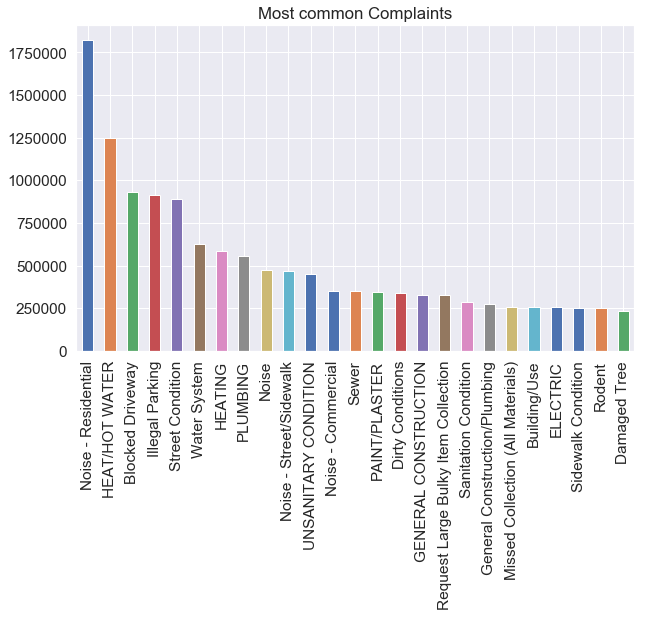

In [72]:
(df_dropped['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6), title = 'Most common Complaints')

In [30]:
df_dropped['Year'] = (df_dropped['Created Date']).dt.year
df_dropped['Month'] = (df_dropped['Created Date']).dt.month
df_dropped['DayofWeek'] = (df_dropped['Created Date']).dt.dayofweek

In [64]:
df_dropped.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Status                                    object
Resolution Description                    object
Resolution Action Updated Date    datetime64[ns]
Community Board                           object
BBL                                      float64
Borough             

In [65]:
df_dropped['Month'].head()

0    4
1    4
2    4
3    4
4    4
Name: Month, dtype: int64

## EXTRACTING DATA FOR POWER BI NALAYSIS

In [32]:
analysis_complaints = df_dropped[["Unique Key","Created Date","Complaint Type","Borough","Agency","Agency Name","City","Borough","Total_Time","Location","Latitude","Longitude"]]
analysis_complaints.head()

,Unique Key,Created Date,Complaint Type,Borough,Agency,Agency Name,City,Borough,Total_Time,Location,Latitude,Longitude
0,27842655,2014-04-14 14:42:00,Water System,STATEN ISLAND,DEP,Department of Environmental Protection,Staten Island,STATEN ISLAND,127.0,"(40.63764599489574, -74.14651579795446)",40.637646,-74.146516
1,27842656,2014-04-14 11:04:00,Sewer,BRONX,DEP,Department of Environmental Protection,Bronx,BRONX,382.0,"(40.842789784424255, -73.88584568128475)",40.842790,-73.885846
2,27842659,2014-04-14 13:27:00,Sewer,QUEENS,DEP,Department of Environmental Protection,Queens Village,QUEENS,0.0,"(40.722789705537885, -73.73549132976942)",40.722790,-73.735491
3,27842660,2014-04-14 12:51:00,Sewer,STATEN ISLAND,DEP,Department of Environmental Protection,Staten Island,STATEN ISLAND,0.0,"(40.63977069540825, -74.08303207959038)",40.639771,-74.083032
4,27842663,2014-04-14 12:35:00,Sewer,QUEENS,DEP,Department of Environmental Protection,Jamaica,QUEENS,0.0,"(40.678151620421175, -73.76200138093122)",40.678152,-73.762001


In [68]:
analysis_complaints = analysis_complaints.compute()

In [69]:
analysis_complaints.shape

(19022028, 12)

In [70]:
analysis_complaints.to_csv("C:\\EZOIC_ASSESSMENT\\analysis_complaints.csv",sep='\t')

## SPLITTING DATA

#### Modelling for different Boroughs  the Complaint Types

In [31]:
df_Brooklyn = df_dropped[df_dropped['Borough'] == 'BROOKLYN']

In [73]:
print("rows in brooklyn",df_Brooklyn.shape[0].compute())

rows in brooklyn 6047424


In [32]:
df_Brooklyn = df_Brooklyn.compute()

In [35]:
df_Manhattan = df_dropped[df_dropped['Borough'] == 'MANHATTAN']

In [36]:
df_Manhattan = df_Manhattan.compute()

In [34]:
df_Brooklyn.to_csv("C:\\EZOIC_ASSESSMENT\\Brooklyn.csv",index = False)

In [37]:
df_Manhattan.to_csv("C:\\EZOIC_ASSESSMENT\\Manhattan.csv",index = False)

In [38]:
df_Queens = df_dropped[df_dropped['Borough'] == 'QUEENS']
df_Bronx = df_dropped[df_dropped['Borough'] == 'BRONX']
df_StatenIsland = df_dropped[df_dropped['Borough'] == 'STATEN ISLAND']

In [39]:
df_Queens = df_Queens.compute()
df_Bronx = df_Bronx.compute()
df_StatenIsland = df_StatenIsland.compute()

In [40]:
df_Queens.to_csv("C:\\EZOIC_ASSESSMENT\\Queens.csv",index = False)
df_Bronx.to_csv("C:\\EZOIC_ASSESSMENT\\Bronx.csv",index = False)
df_StatenIsland.to_csv("C:\\EZOIC_ASSESSMENT\\StatenIsland.csv",index = False)